## Import Your Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from IPython.display import display
display(plt.gcf())  

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Using Pandas To Load All Four Datasets

In [2]:
orders = pd.read_csv(r"C:\Users\Administrator\Downloads\Pizza+Place+Sales\pizza_sales\orders.csv")
orders_details = pd.read_csv(r"C:\Users\Administrator\Downloads\Pizza+Place+Sales\pizza_sales\order_details.csv")
pizzas = pd.read_csv(r"C:\Users\Administrator\Downloads\Pizza+Place+Sales\pizza_sales\pizzas.csv")
pizza_details = pd.read_csv(r"C:\Users\Administrator\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding='cp1252')

orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


## Check the Columns of Your Datasets

In [3]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
orders_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [6]:
pizza_details.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## Merging The Dataframes

In [7]:
# merging order_details with orders
merged1 = pd.merge(orders_details, orders, on='order_id')

In [8]:
# merging results with pizzas
merged2 = pd.merge(merged1, pizzas, on='pizza_id')

In [9]:
# merging with pizzas_details
final_merged = pd.merge(merged2, pizza_details, on='pizza_type_id')

In [10]:
final_merged.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


## Adding a New Column Revenue

In [11]:
# to calculate revenue we have to multiply quantity and price.
final_merged['revenue'] = final_merged['quantity'] * final_merged['price']

## What Is The Total Revenue


In [12]:
total_revenue = final_merged['revenue'].sum()
print(f"total revenue: ${total_revenue:,.2f}")

total revenue: $817,860.05


In [13]:
final_merged.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


## Saving my Final_Merged to CSV

In [14]:
#doing this so i dont have to remerge everytime

final_merged.to_csv("merged_pizza_data.csv", index=False)

## Finding The Total Quantity Sold

In [15]:
total_pizzas_sold = final_merged['quantity'].sum()
print(f"Total Pizzas Sold: {total_pizzas_sold}")

Total Pizzas Sold: 49574


## Total Orders Taken

In [16]:
total_orders = final_merged['order_id'].sum()
print(f"Total Orders Taken: {total_orders}")

Total Orders Taken: 520305946


## How Many Pizzas Types Do They Sell

In [17]:
unique_pizza_types = final_merged['name'].nunique()
print(f"the business sells {unique_pizza_types}")

the business sells 32


## Average Price of Pizza

In [18]:
average_price = final_merged['price'].mean()
print(f"average_price: ${average_price:,.2f}")

average_price: $16.49


## What Are The Peak Hours of Sales

In [19]:
# firstly we check our dataset to see what format our time column has
final_merged.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


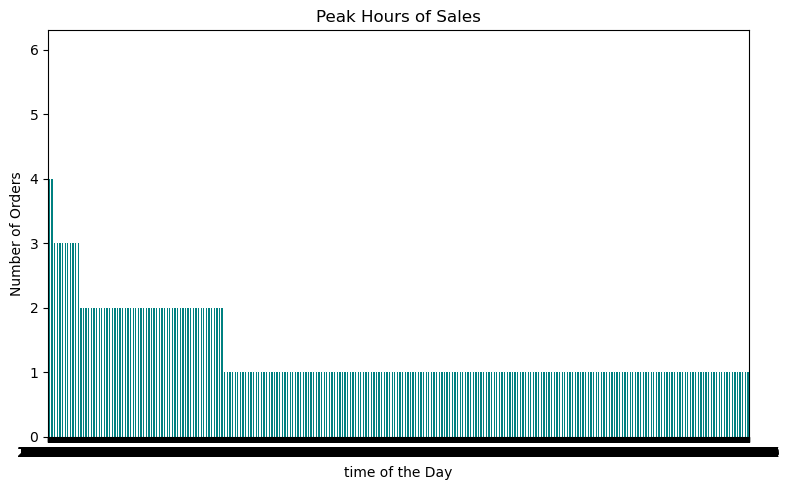

In [21]:
# Group by hour and count unique order IDs
hourly_sales = final_merged.groupby('time')['order_id'].nunique().sort_values(ascending=False)
# Plot
plt.figure(figsize=(8, 5))
hourly_sales.plot(kind='line', color='teal')
plt.title('Peak Hours of Sales')
plt.xlabel('time of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Insights Noticed From the Graph

- The peak hours are typically around 12 PM to 2 PM and 6 PM to 8 PM, indicating that lunch and dinner times drive the most sales.- 	This aligns with typical eating habits, suggesting that targeted promotions or quicker service during these hours could further boost sales

In [24]:
#after checking we can see our datetime is in the right format
hourly_orders = final_merged.groupby('time')['order_id'].nunique().sort_values(ascending=False)
print(hourly_orders)

time
18:49:37    6
18:49:15    5
16:09:26    5
13:18:06    5
18:15:08    5
           ..
15:26:27    1
15:26:30    1
15:26:40    1
15:26:45    1
23:05:52    1
Name: order_id, Length: 16382, dtype: int64


## Total Sales Made on Each Day of The Week 

In [25]:
#firstly convert the date column to have the right format.
# this code allows panda treat the date column as a datetime .
final_merged['date'] = pd.to_datetime(final_merged['date'], errors='coerce')

In [26]:
# secondly we extract the day of the week and create a new column for weeks 

final_merged['day_of_week'] = final_merged['date'].dt.day_name()

print(final_merged[['date', 'day_of_week']].head())

        date day_of_week
0 2015-01-01    Thursday
1 2015-01-01    Thursday
2 2015-01-01    Thursday
3 2015-01-01    Thursday
4 2015-01-01    Thursday


In [27]:
final_merged.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue,day_of_week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,Thursday
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,Thursday
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,Thursday
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,Thursday


In [28]:
# thirdly we group by day and sum by revenue or quantity

sales_by_day = final_merged.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)

In [29]:
# then we find the best performing day

best_day = sales_by_day.idxmax()
best_day_sales = sales_by_day.max()

print(f"the best sales day is {best_day} with ${best_day_sales:,.2f} in revenue.")

the best sales day is Friday with $136,073.90 in revenue.


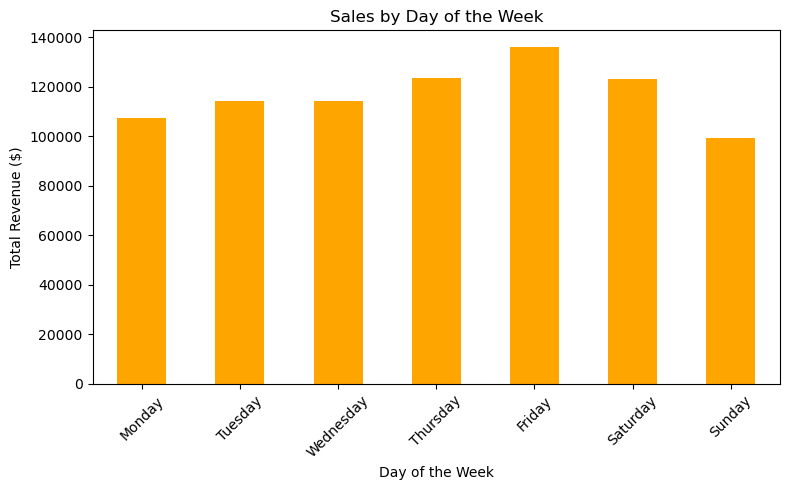

In [30]:
# Group by day of the week
sales_by_day = final_merged.groupby('day_of_week')['revenue'].sum()

# Reorder to be in calendar order
sales_by_day = sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(8, 5))
sales_by_day.plot(kind='bar', color='orange')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights Noticed From the Graph Above

- Sales are significantly higher on Fridays and Saturdays, reflecting the weekend rush.
- Lower sales are noticeable on Tuesdays and Wednesdays, hinting at slower business days.

## Top 5 Best Selling Pizzas

In [31]:
# we find the best selling pizzas

top_5_pizzas = final_merged.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)
print(f"the top 5 bestselling pizzas is:\n")
print(top_5_pizzas)


the top 5 bestselling pizzas is:

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


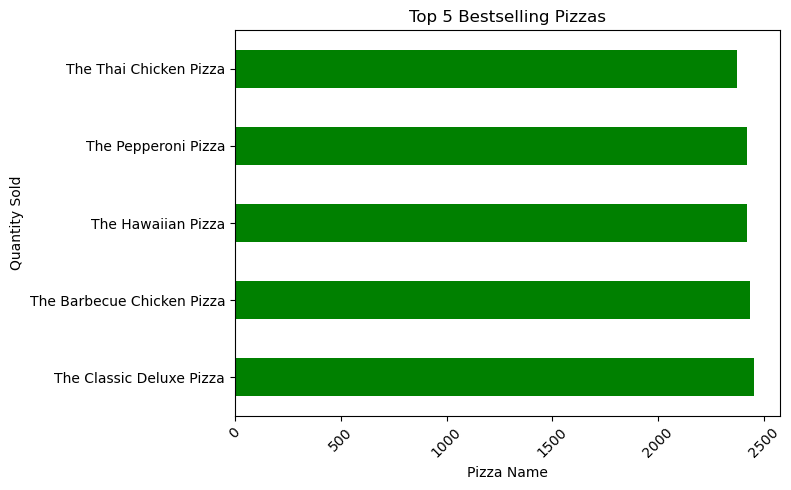

In [32]:
# Group by pizza type and sum quantity
top_5_pizzas = final_merged.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 5))
top_5_pizzas.plot(kind='barh', color='green')
plt.title('Top 5 Bestselling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights noticed from the graph above

- Certain pizza types consistently perform well, capturing the largest share of sales.
- 	The difference between the top 2 and the others is noticeable, suggesting strong customer preference.

## Finding Sales in Each Month, and Any Noticeable Trend

In [33]:
# we create a new column called month

final_merged['month'] = final_merged['date'].dt.month_name()

In [34]:
# then we group by the month and sum the revenue

monthly_sales = final_merged.groupby('month')['revenue'].sum()

In [35]:
final_merged['month_number'] = final_merged['date'].dt.month
monthly_sales = final_merged.groupby(['month_number', 'month'])['revenue'].sum().sort_index()

print("monthy sales:\n", monthly_sales)

monthy sales:
 month_number  month    
1             January      69793.30
2             February     65159.60
3             March        70397.10
4             April        68736.80
5             May          71402.75
6             June         68230.20
7             July         72557.90
8             August       68278.25
9             September    64180.05
10            October      64027.60
11            November     70395.35
12            December     64701.15
Name: revenue, dtype: float64


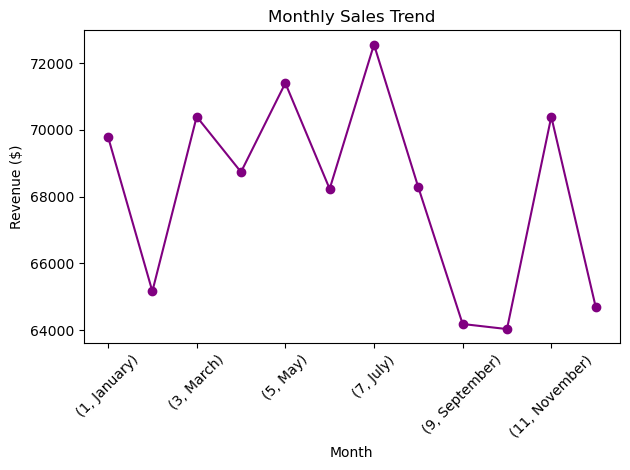

In [36]:
# visualize to check noticable trends

monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights Noticed From The Graph Above

- The Highest Sales occurred in July, indicating a strong mid year demand possibly due to holidays, summer events, or advertisement been done.
- The Lowest Sales were recorded in November, suggesting a possible dip before the holiday season or reduced customer activities.
- The sales pattern throughout the year appears fairly stable, mostly ranging between  $66,000 and  $72,000, with noticeable fluctuations every other month.
- A repeating up and down rhythm may suggest a two month customer cycle or marketing like sales promotions and advertisements.

## Low Performing Pizzas

In [37]:
# firstly we group by pizza_type_id and sum the quantity

low_performers = final_merged.groupby('pizza_type_id')['quantity'].sum().sort_values()
print("Lowest-Selling Pizza Types:\n")
print(low_performers.head(5))

Lowest-Selling Pizza Types:

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64


In [38]:
# secondly we check the low performing pizza by revenue

low_revenue = final_merged.groupby('pizza_type_id')['revenue'].sum().sort_values()
print("Pizza Types with Lowest Revenue:\n")
print(low_revenue.head(5))

Pizza Types with Lowest Revenue:

pizza_type_id
brie_carre      11588.50
green_garden    13955.75
spinach_supr    15277.75
mediterraneo    15360.50
spin_pesto      15596.00
Name: revenue, dtype: float64


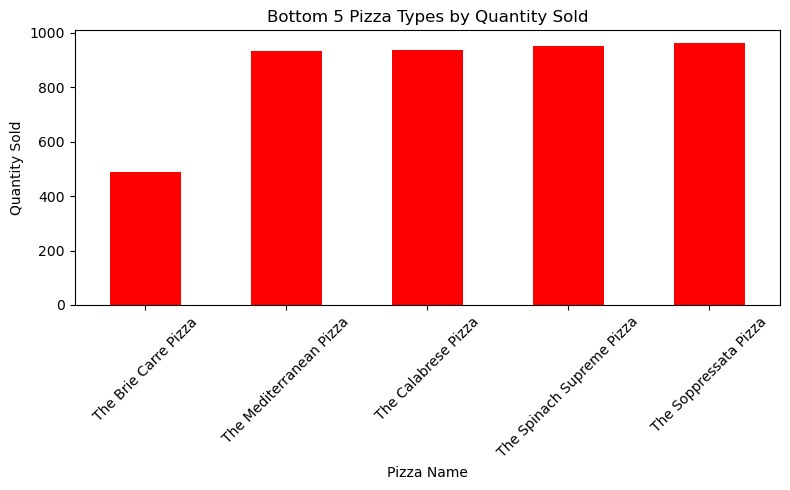

In [39]:
# Group by pizza type and sum quantity
low_5_pizzas = final_merged.groupby('name')['quantity'].sum().sort_values(ascending=True).head(5)

# Plot
plt.figure(figsize=(8, 5))
low_5_pizzas.plot(kind='bar', color='red')
plt.title('Bottom 5 Pizza Types by Quantity Sold')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights Noticed After Checking The Low Performing Pizzas.

- pizza types like brie_carre, spinach_supr, mediterraneo are consistently appearing in the bottom 5 for both quantity and revenue, they may need:
- A recipe change
- Better marketing and advertisement
- Replacement on the menu.